In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

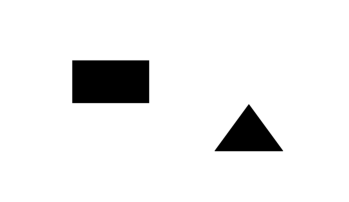

In [5]:
map_ori = cv2.imread('map.png')
map_ori = cv2.cvtColor(map_ori, cv2.COLOR_BGR2RGB)
plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(map_ori)
plt.show()

In [6]:
# init point
qInit.x = 50
qInit.y = 50
tree.append(qInit)
map_rrt = cv2.circle(map_ori, (qInit.x,qInit.y), 20, (255,0,0), -1)

# goal point 
qGoal.x = 1000
qGoal.y = 1000
map_rrt = cv2.circle(map_rrt, (qGoal.x,qGoal.y), 20, (0,0,255), -1)

y_max = map_ori.shape[0]
x_max = map_ori.shape[1]
print(y_max, x_max)

1296 2304


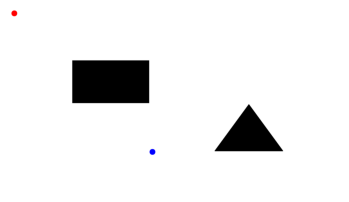

In [7]:
plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(map_rrt)
plt.show()

In [9]:
gamma = 300
qRand.x = np.random.randint(0+gamma, x_max-gamma)
qRand.y = np.random.randint(0+gamma, y_max-gamma)

dist2Rand = []
for i in range(len(tree)):
    dist2Rand.append(calDist(qRand, tree[i]))
m = min(dist2Rand)
mIndex = dist2Rand.index(m)

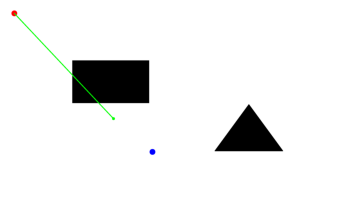

In [10]:
map_rrt = cv2.circle(map_rrt, (qRand.x,qRand.y), 10, (0,255,0), -1)
cv2.line(map_rrt, (tree[mIndex].x, tree[mIndex].y), (qRand.x, qRand.y), (0,255,0), 5)
plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(map_rrt)
plt.show()

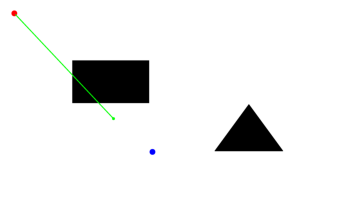

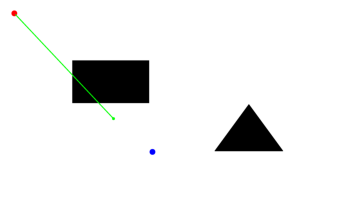

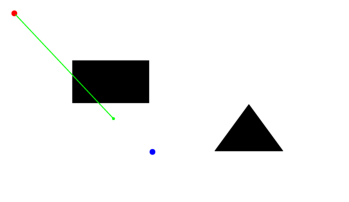

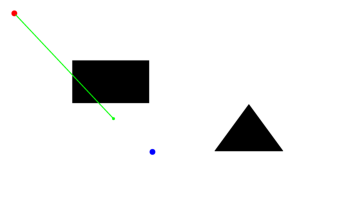

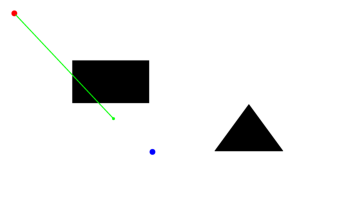

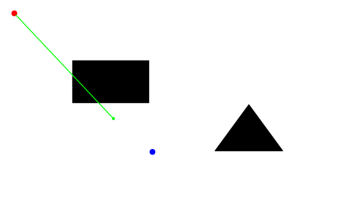

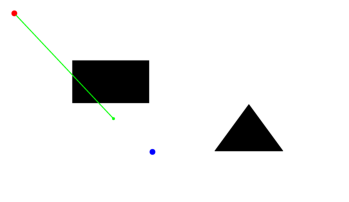

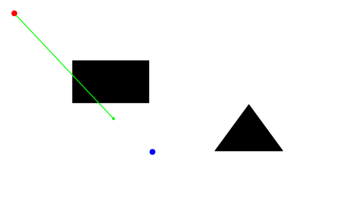

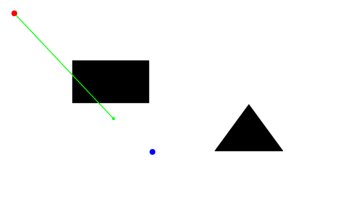

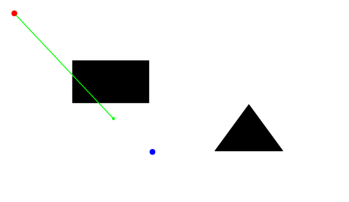

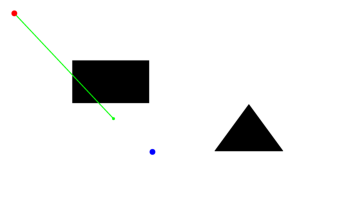

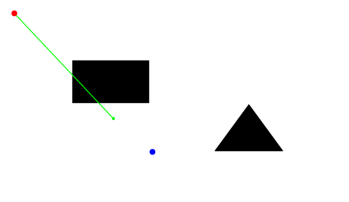

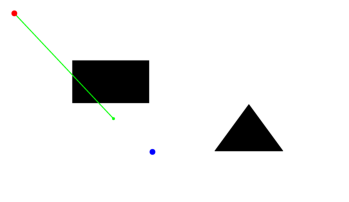

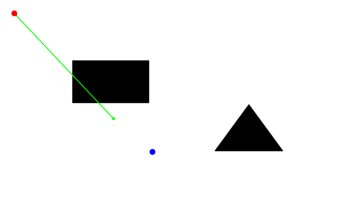

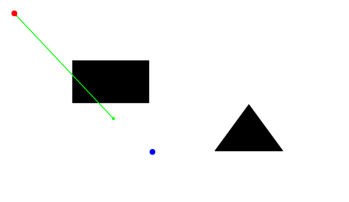

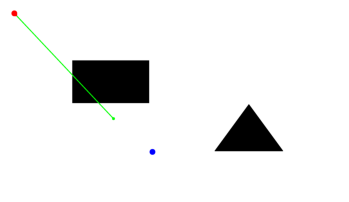

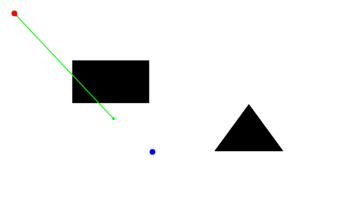

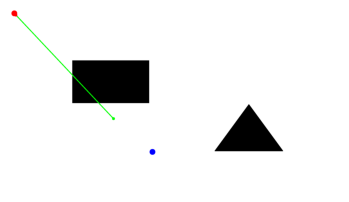

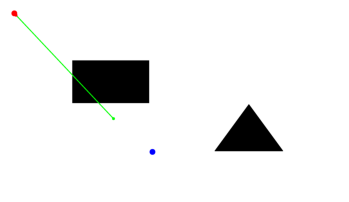

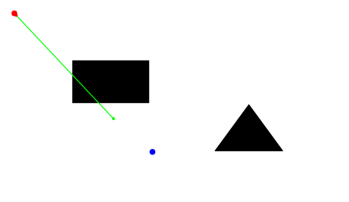

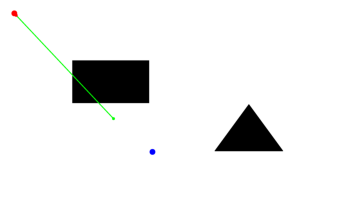

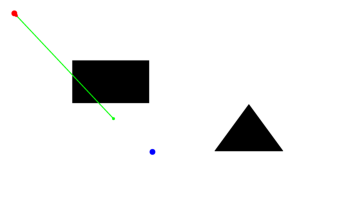

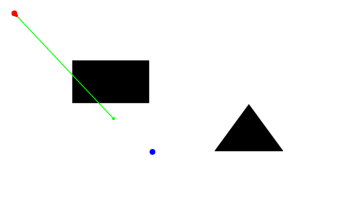

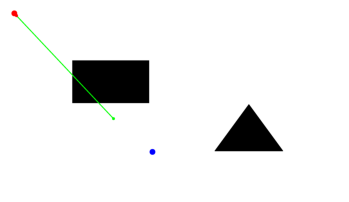

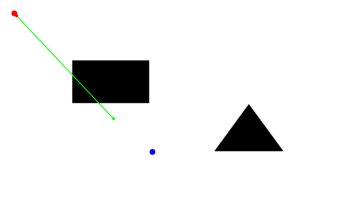

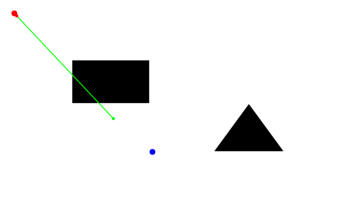

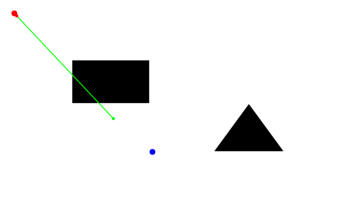

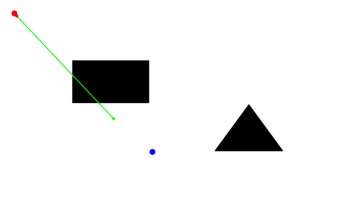

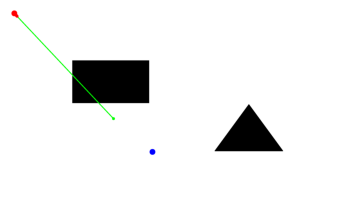

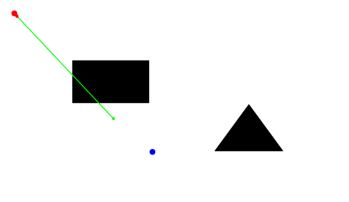

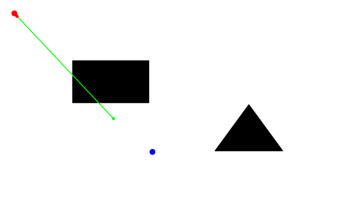

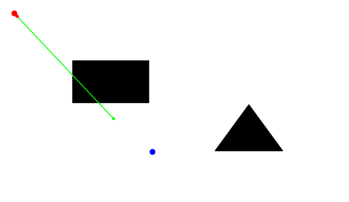

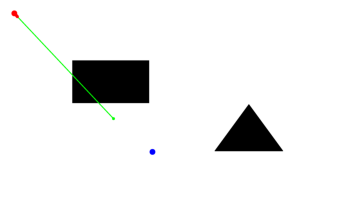

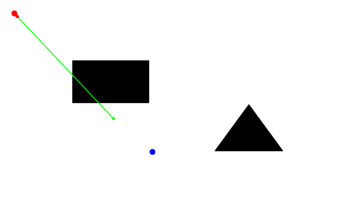

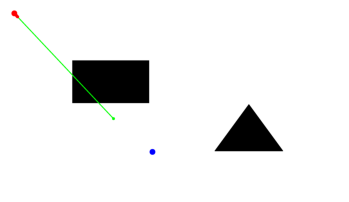

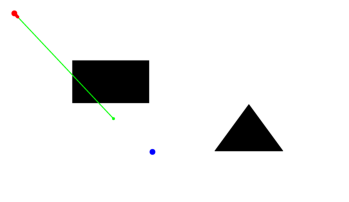

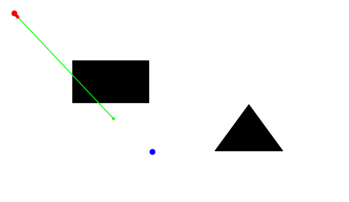

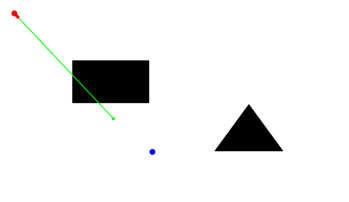

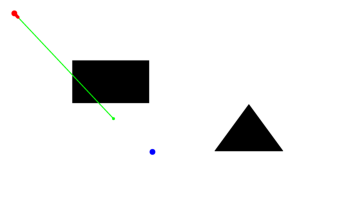

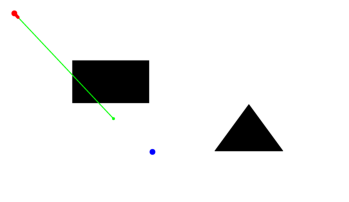

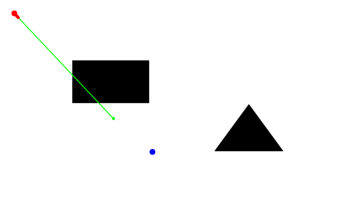

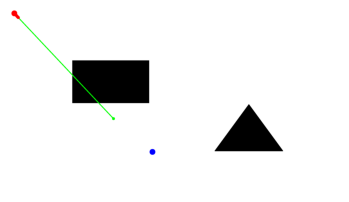

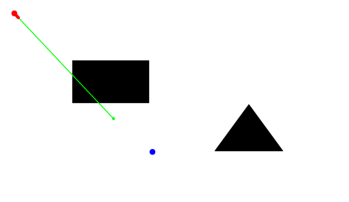

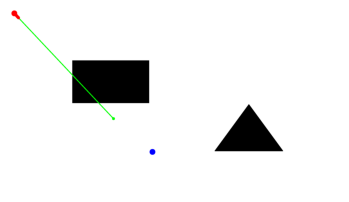

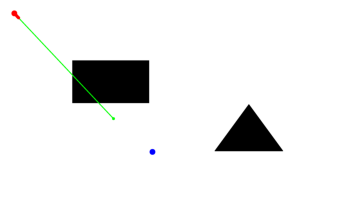

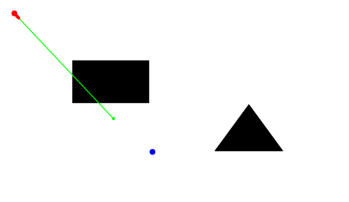

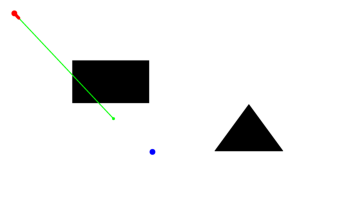

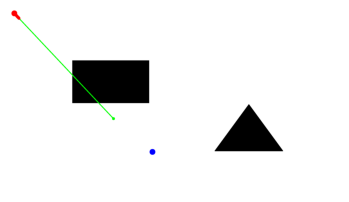

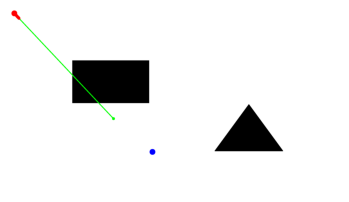

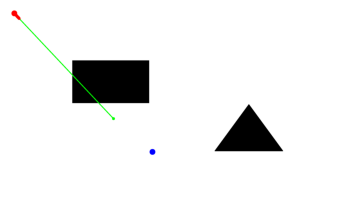

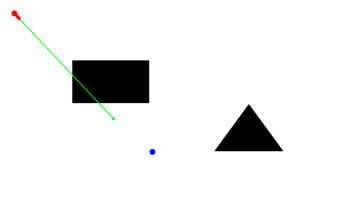

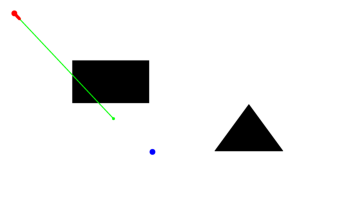

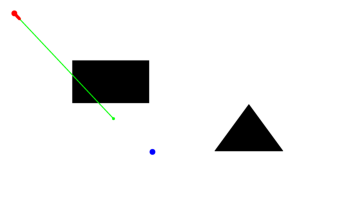

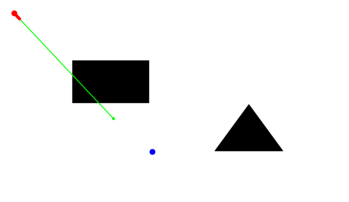

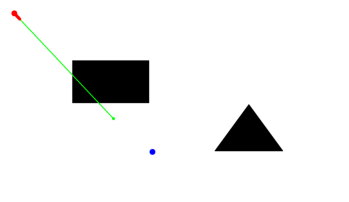

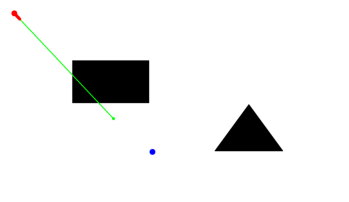

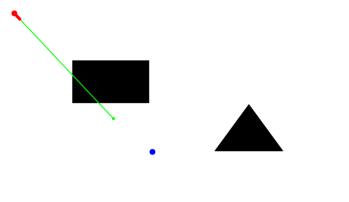

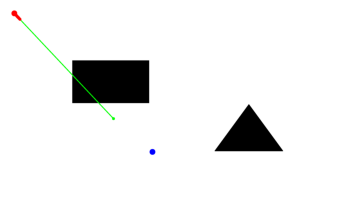

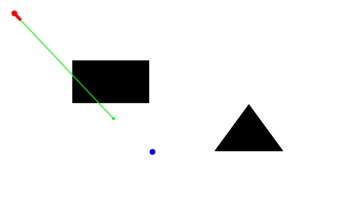

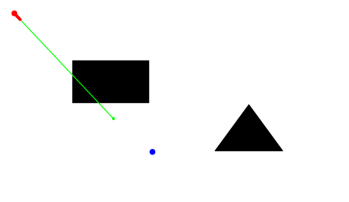

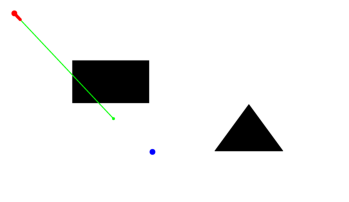

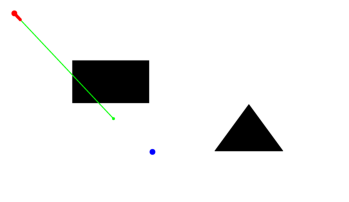

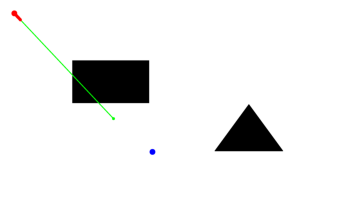

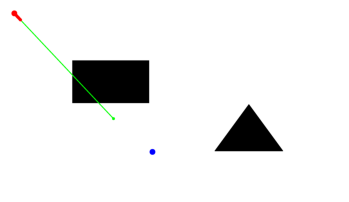

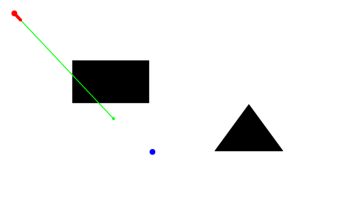

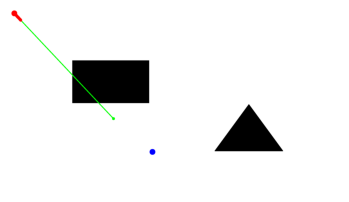

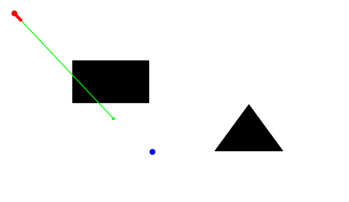

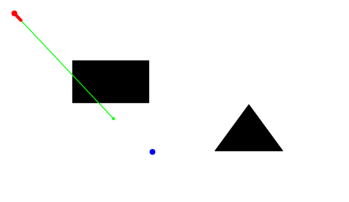

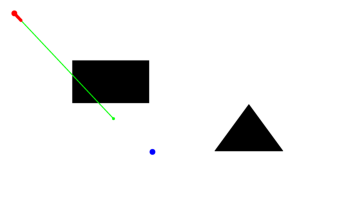

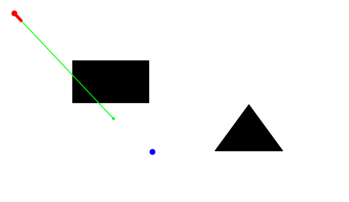

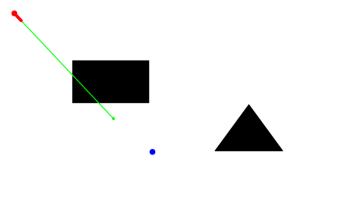

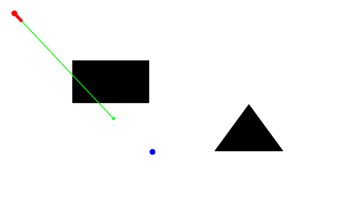

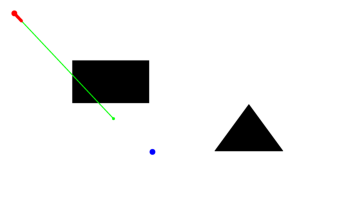

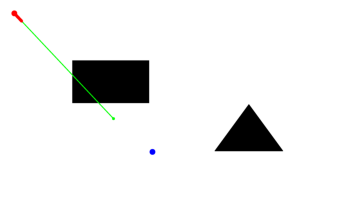

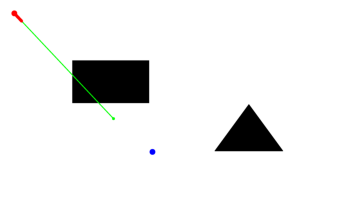

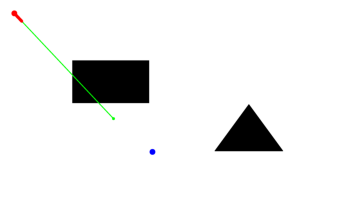

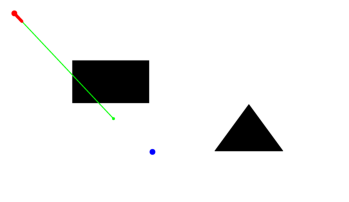

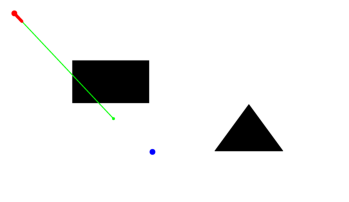

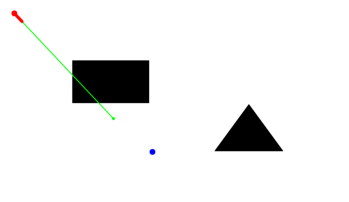

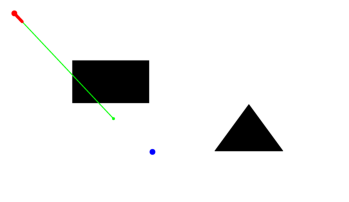

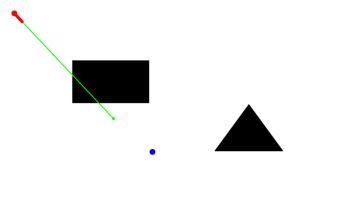

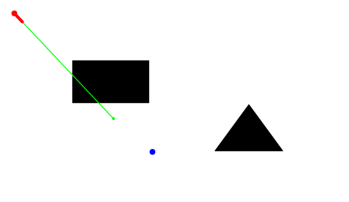

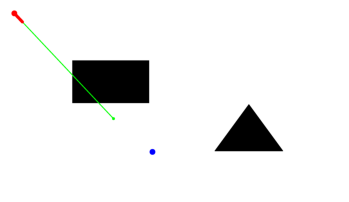

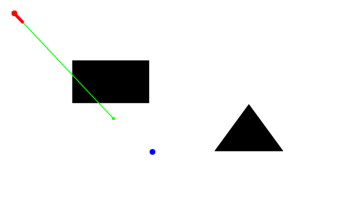

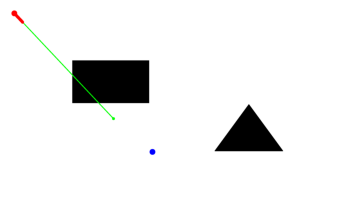

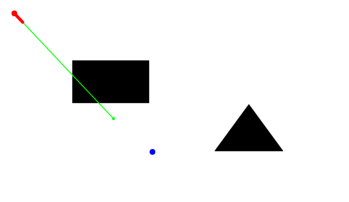

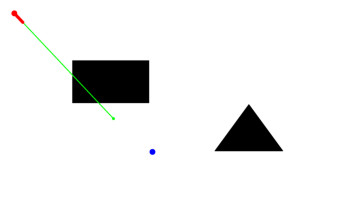

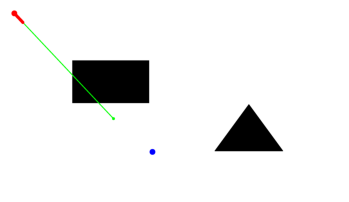

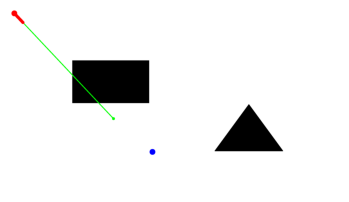

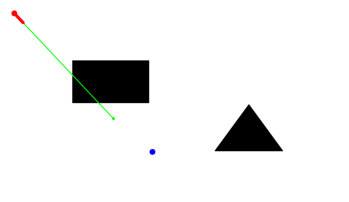

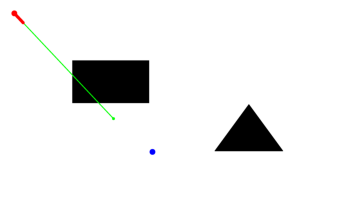

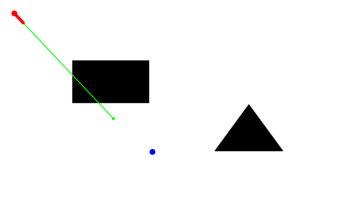

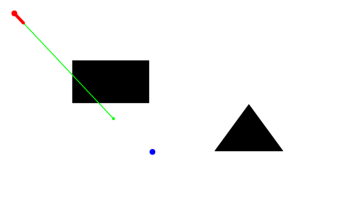

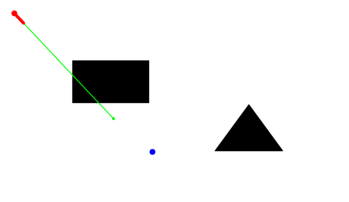

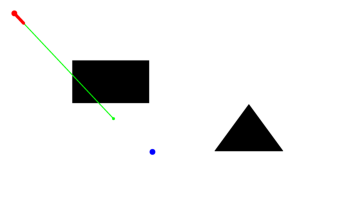

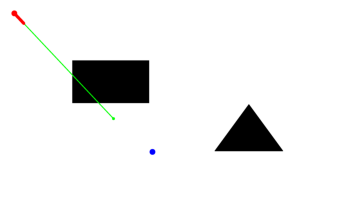

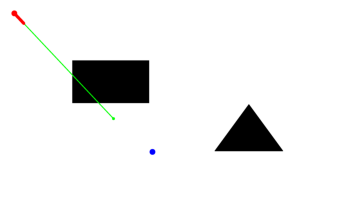

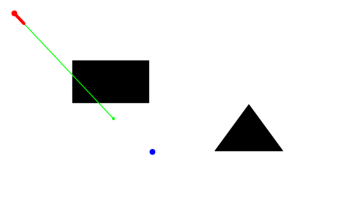

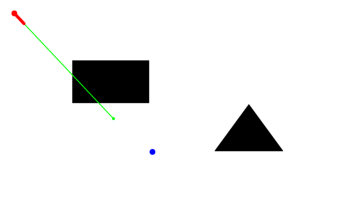

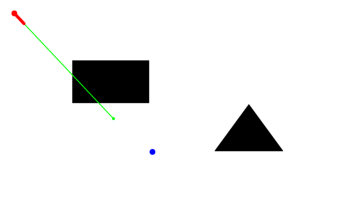

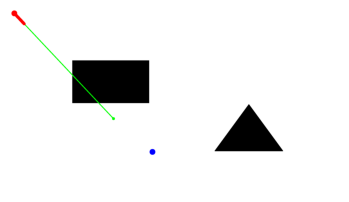

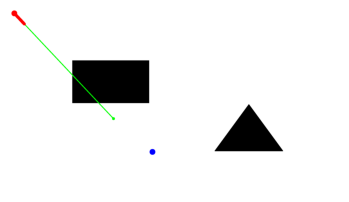

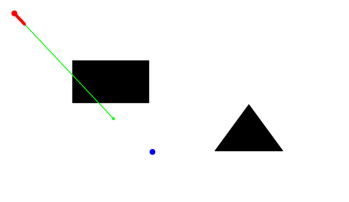

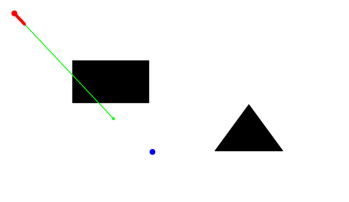

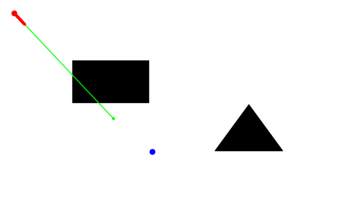

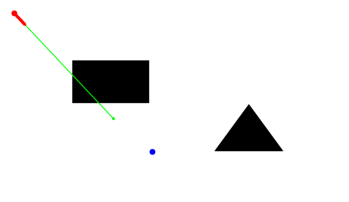

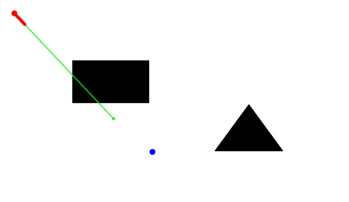

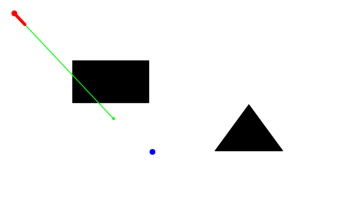

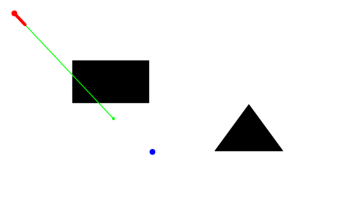

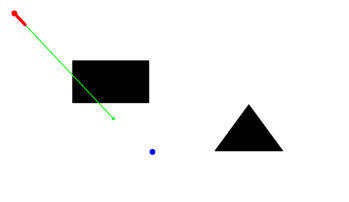

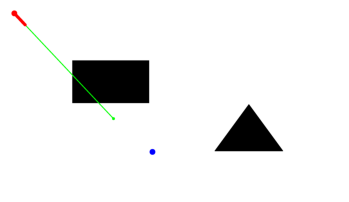

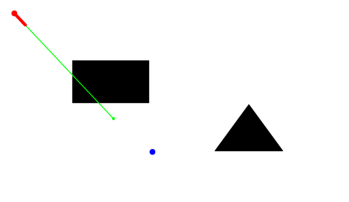

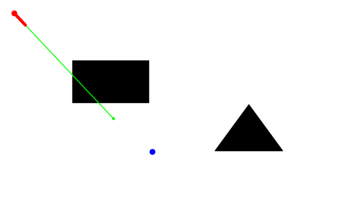

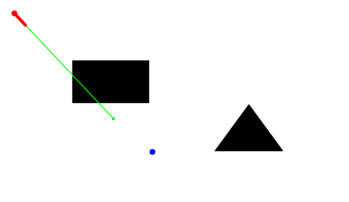

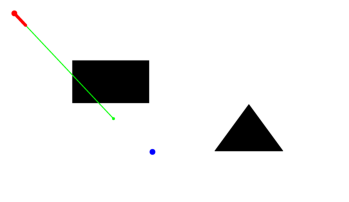

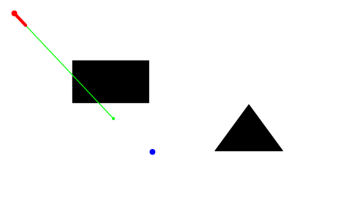

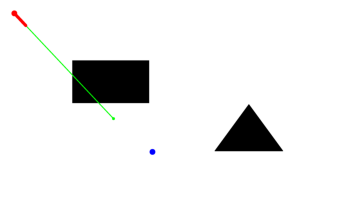

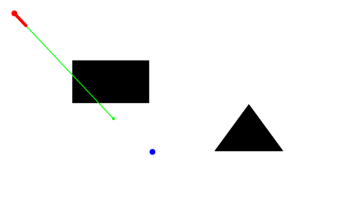

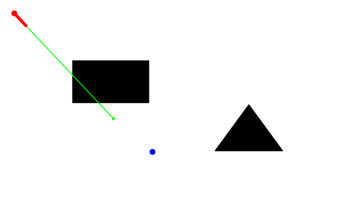

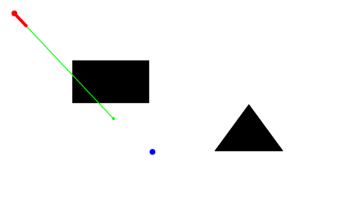

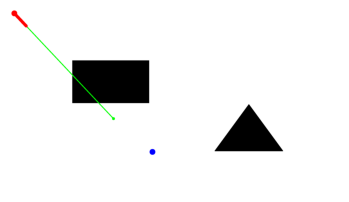

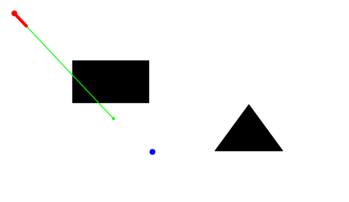

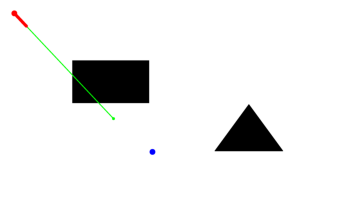

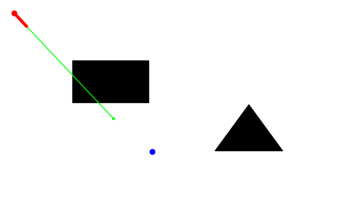

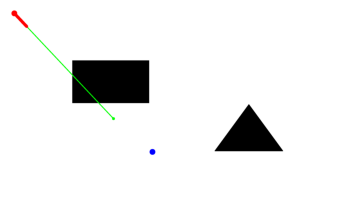

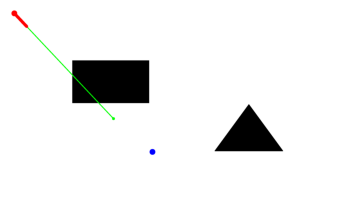

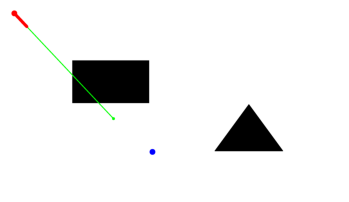

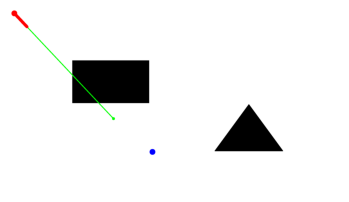

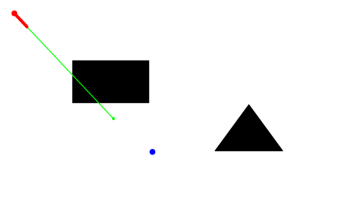

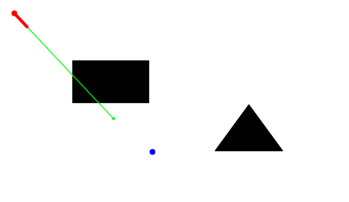

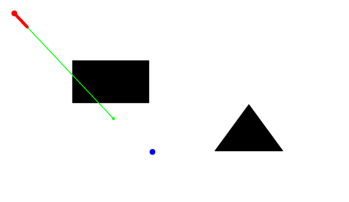

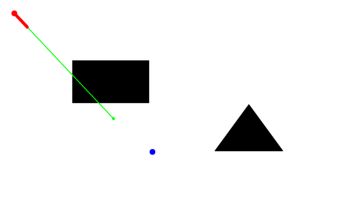

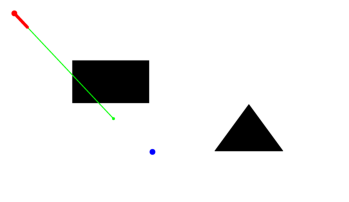

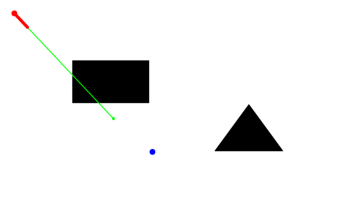

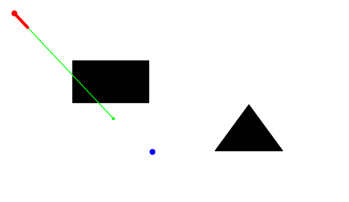

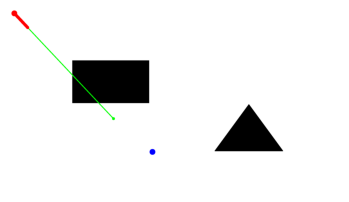

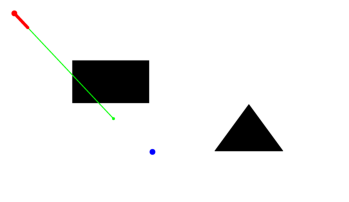

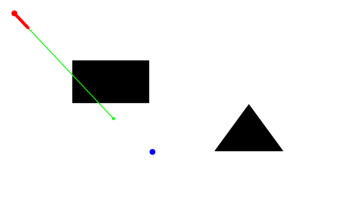

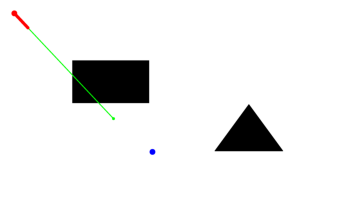

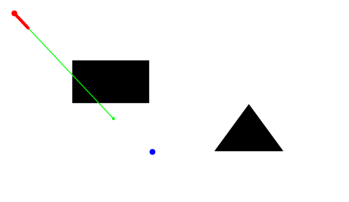

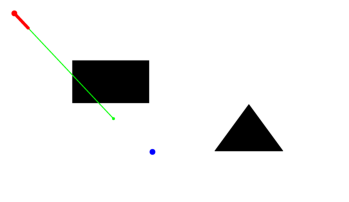

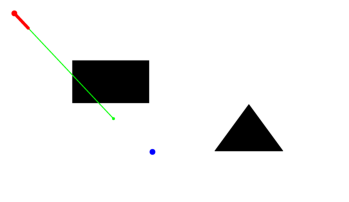

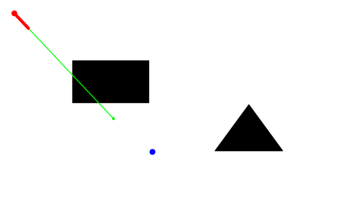

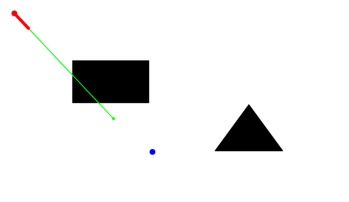

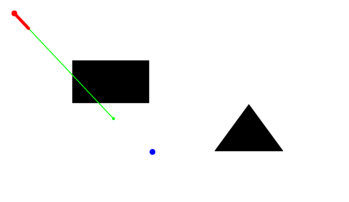

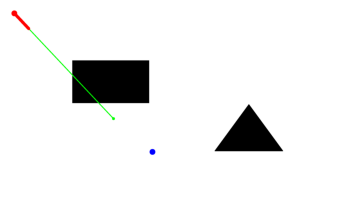

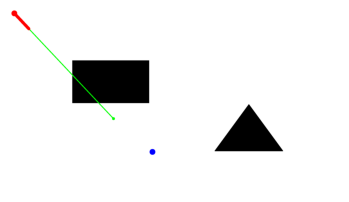

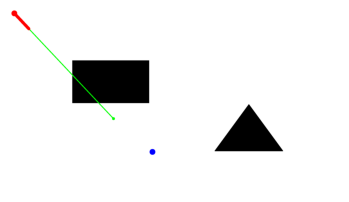

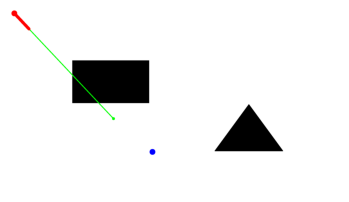

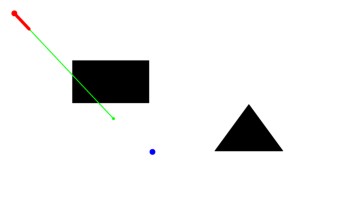

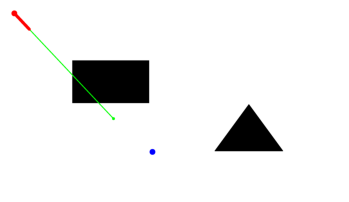

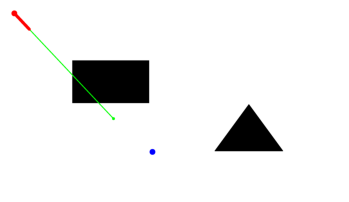

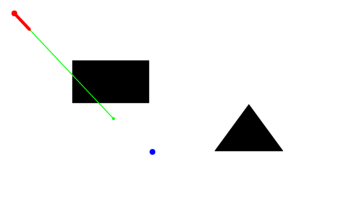

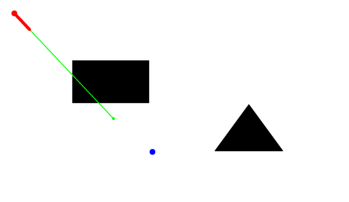

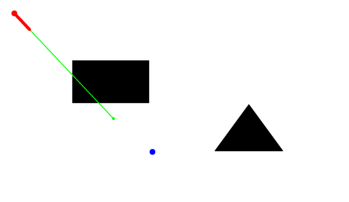

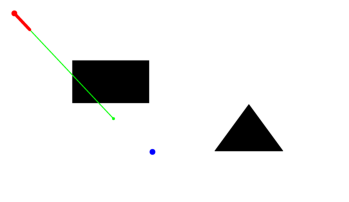

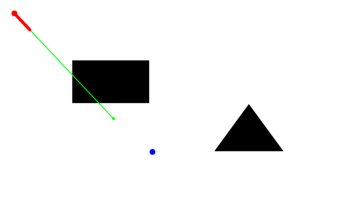

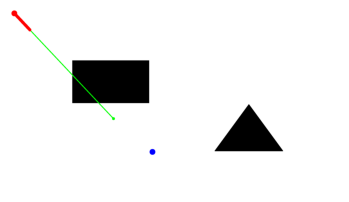

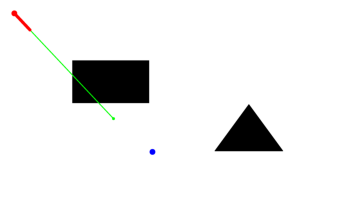

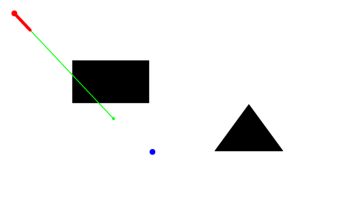

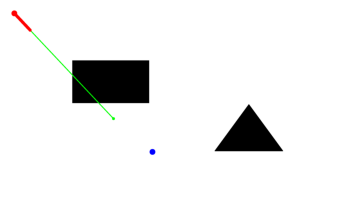

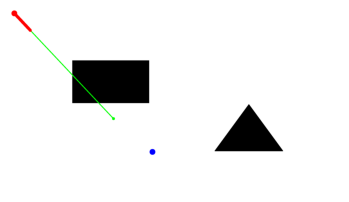

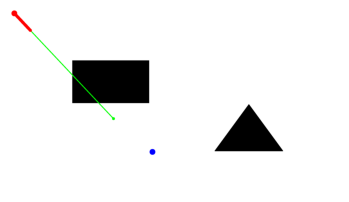

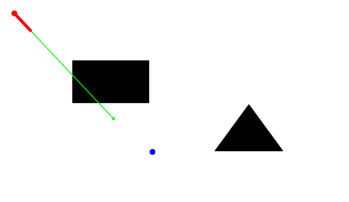

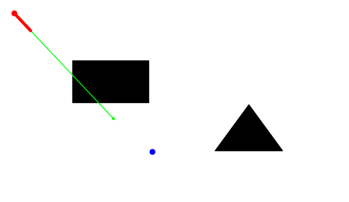

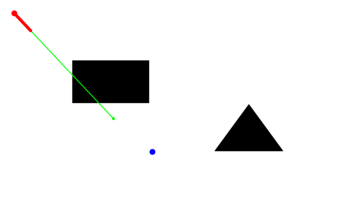

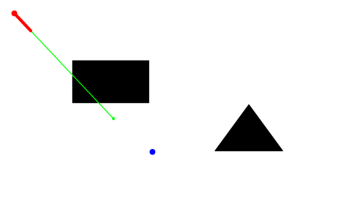

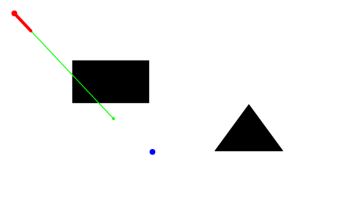

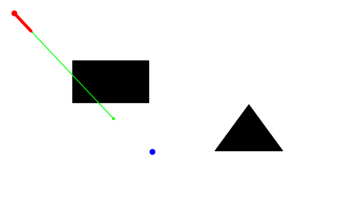

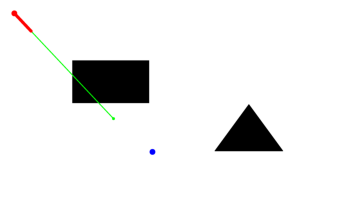

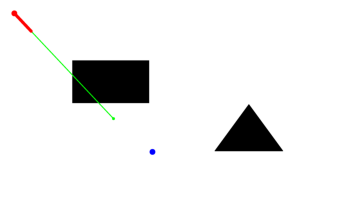

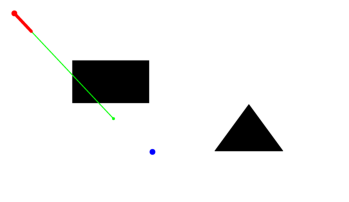

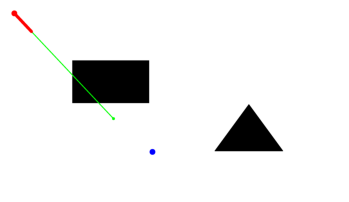

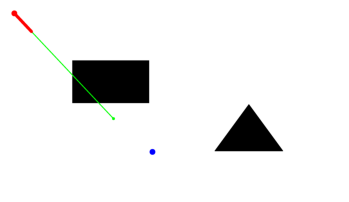

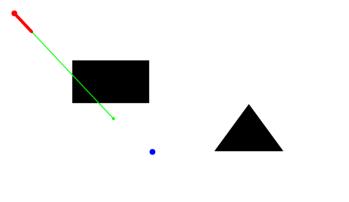

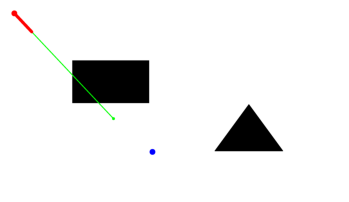

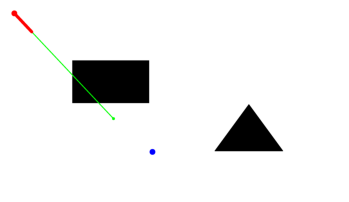

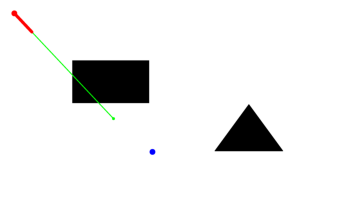

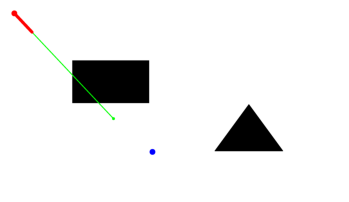

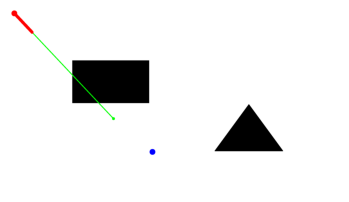

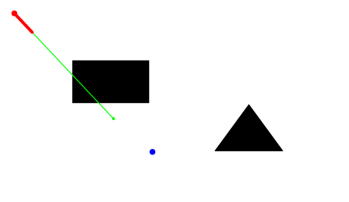

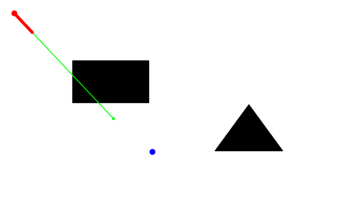

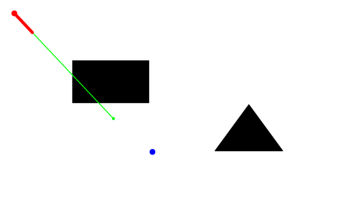

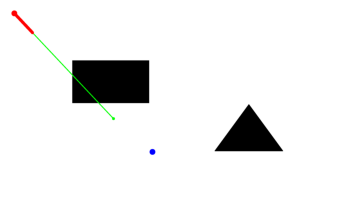

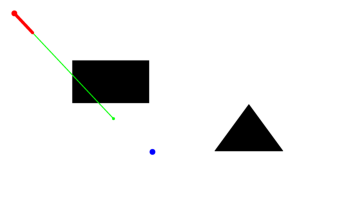

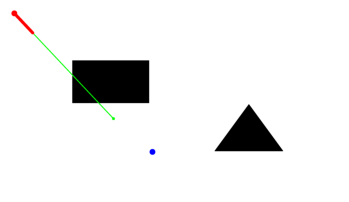

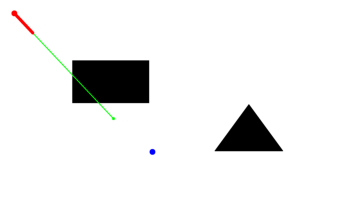

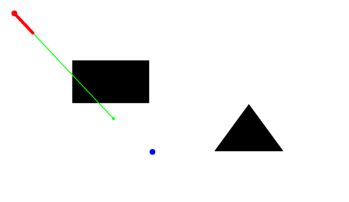

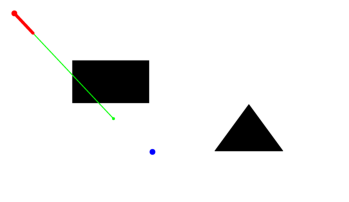

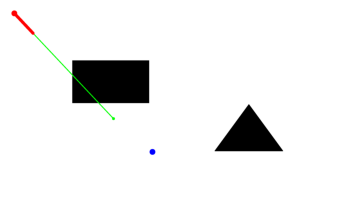

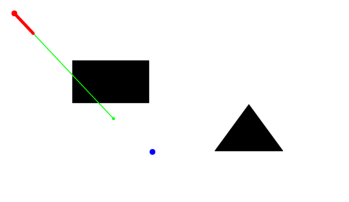

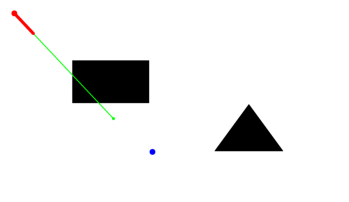

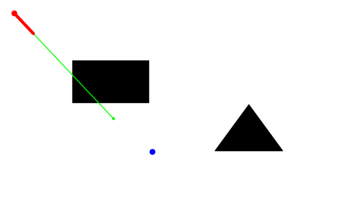

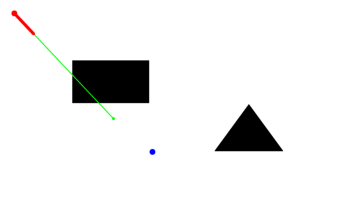

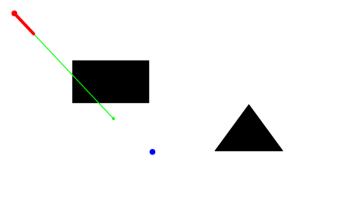

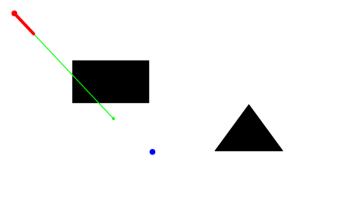

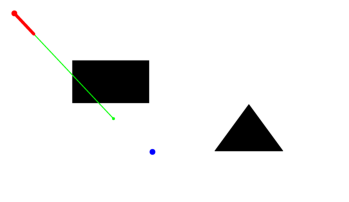

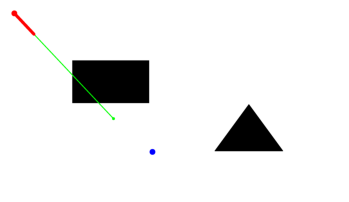

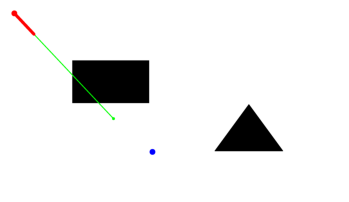

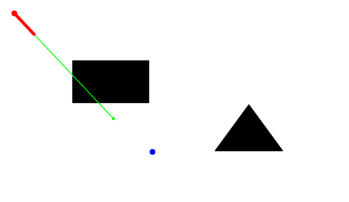

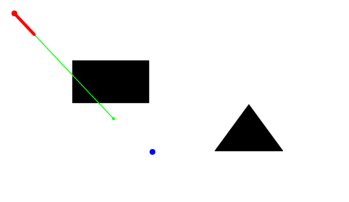

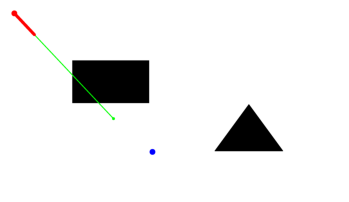

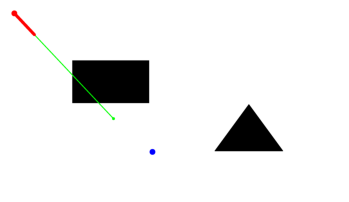

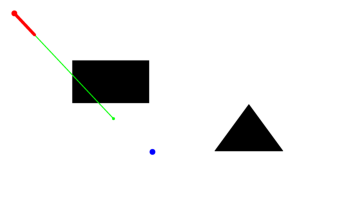

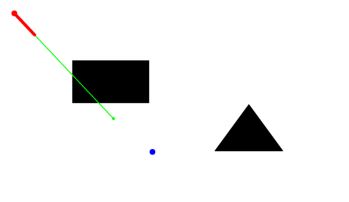

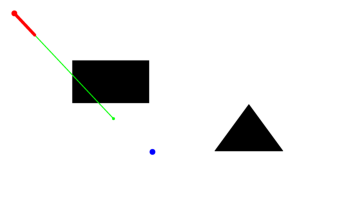

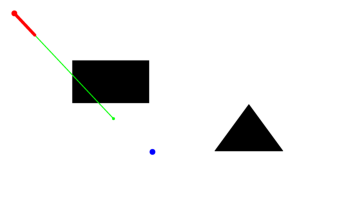

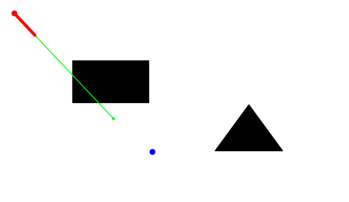

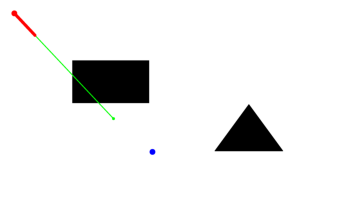

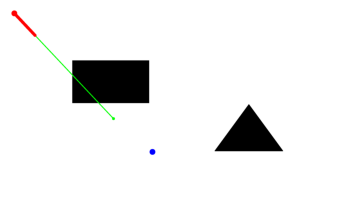

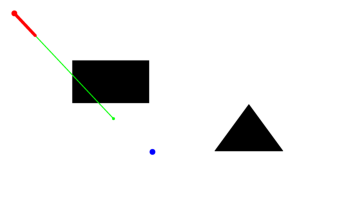

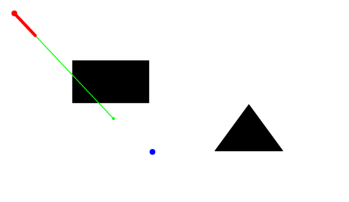

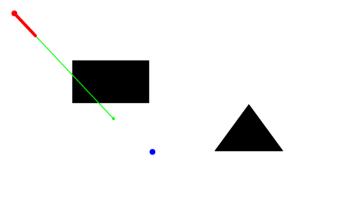

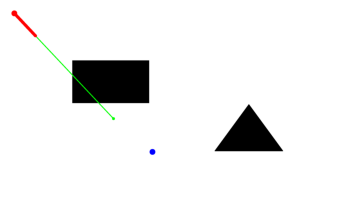

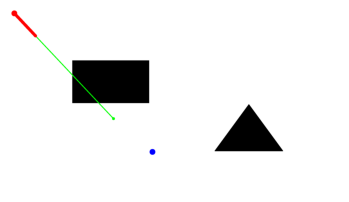

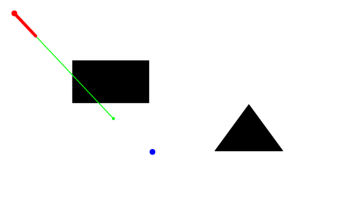

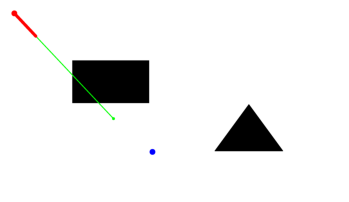

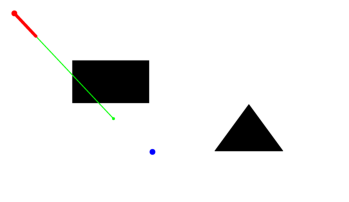

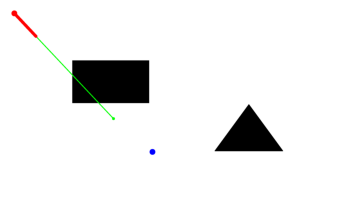

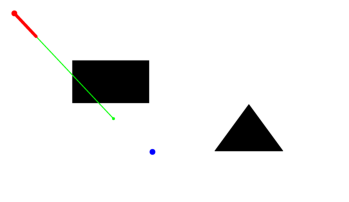

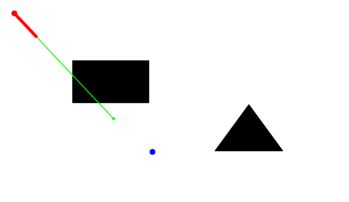

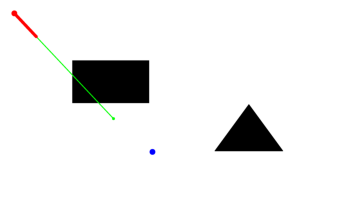

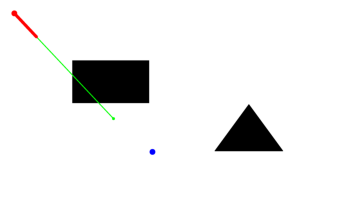

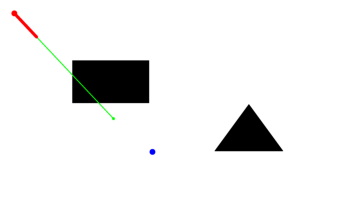

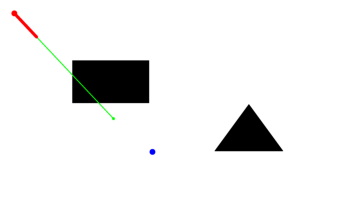

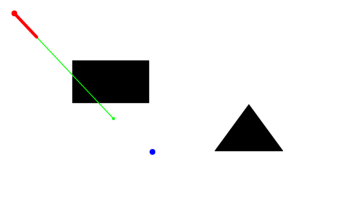

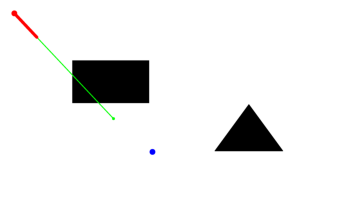

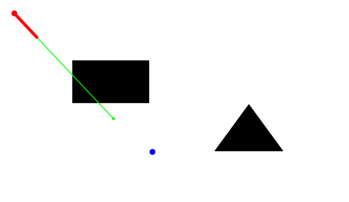

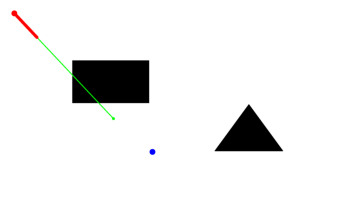

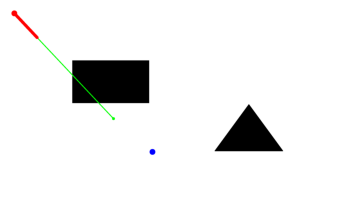

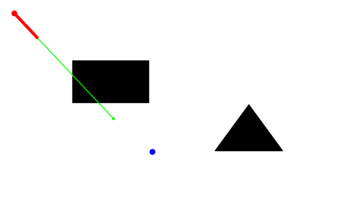

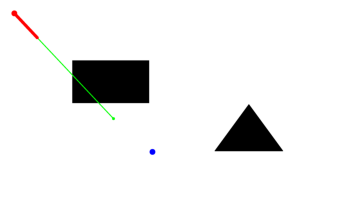

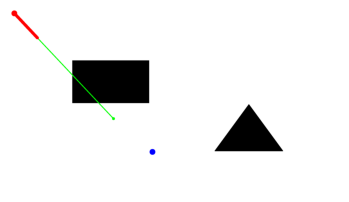

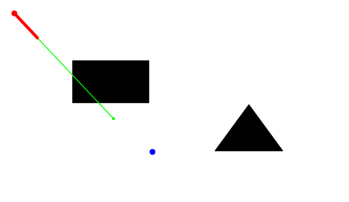

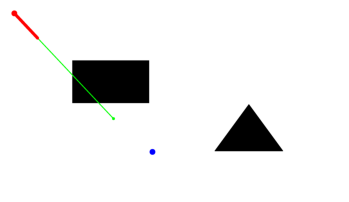

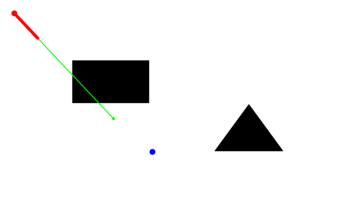

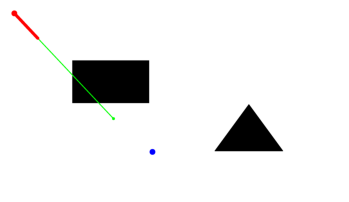

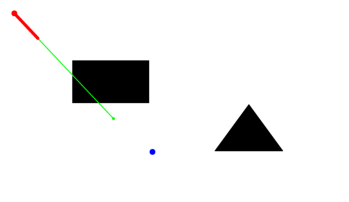

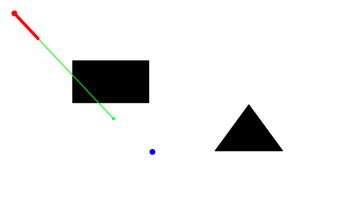

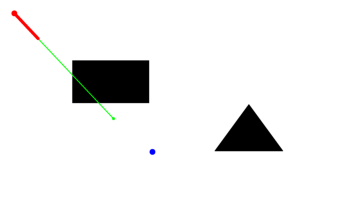

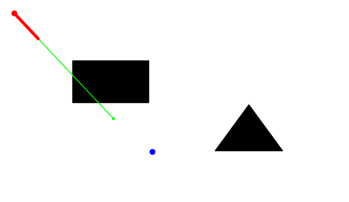

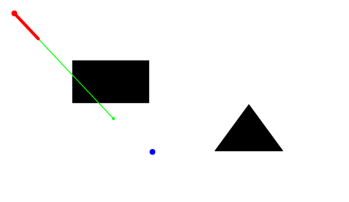

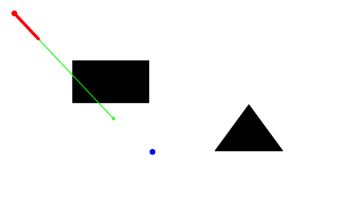

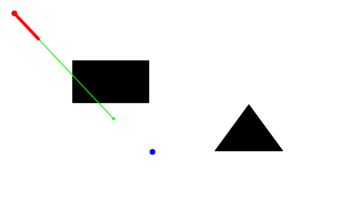

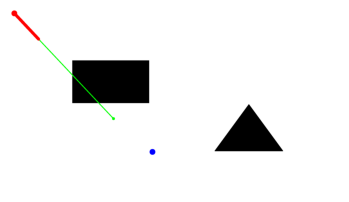

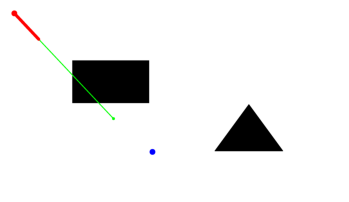

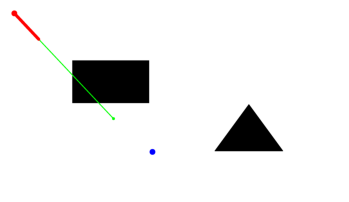

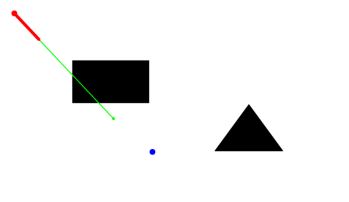

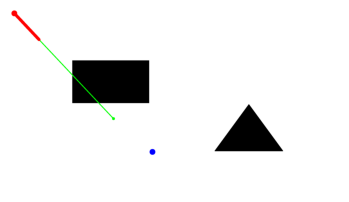

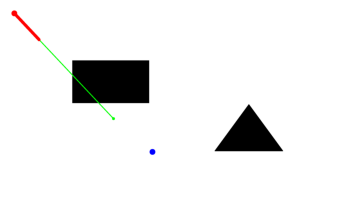

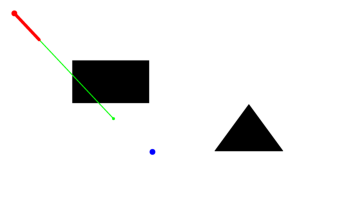

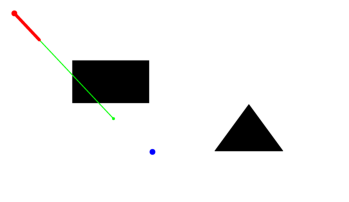

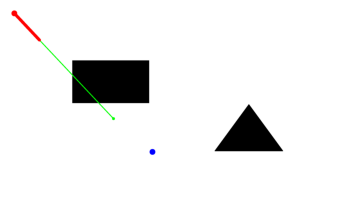

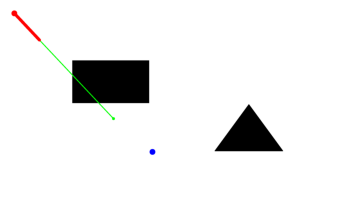

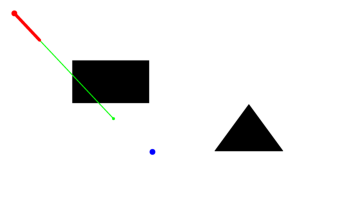

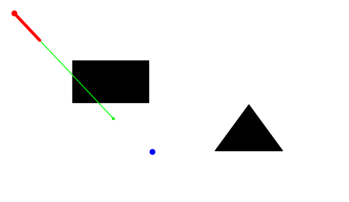

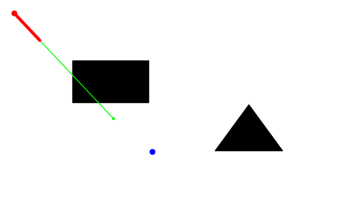

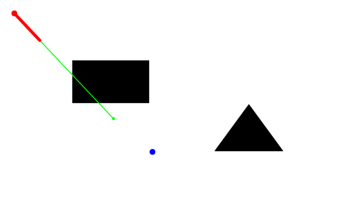

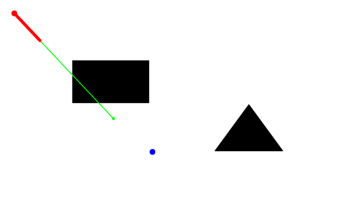

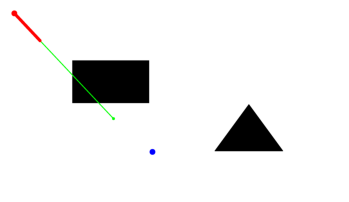

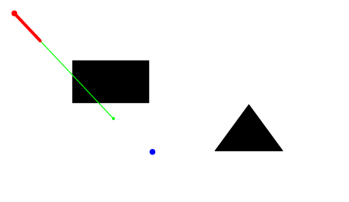

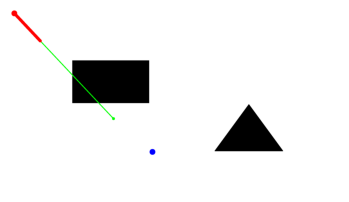

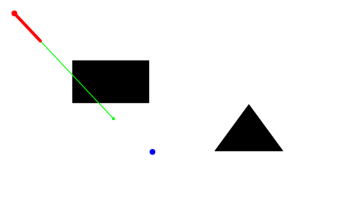

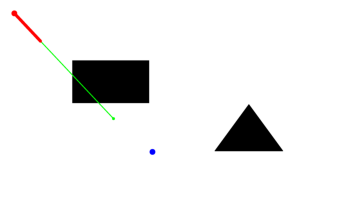

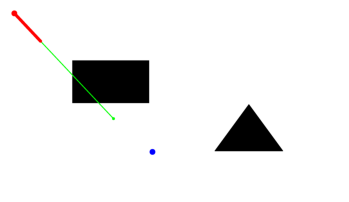

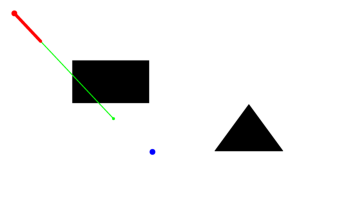

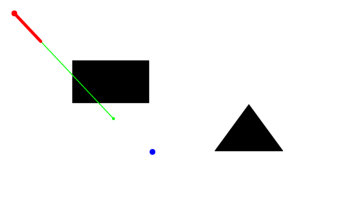

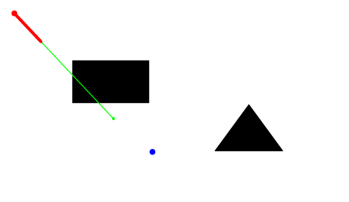

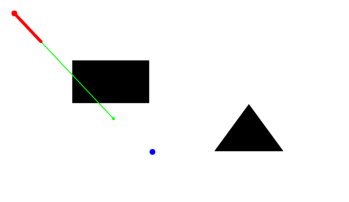

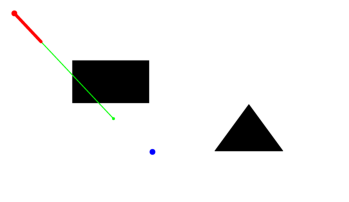

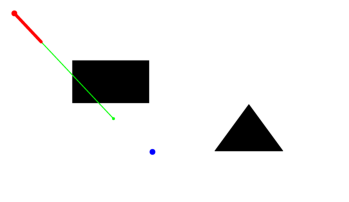

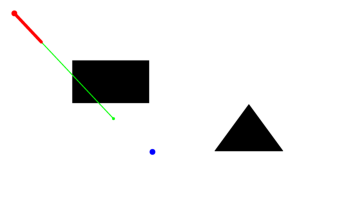

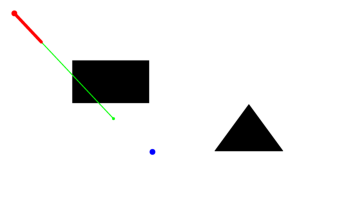

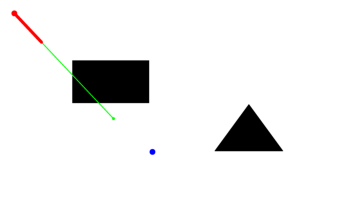

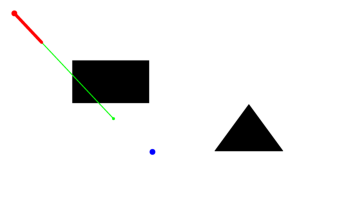

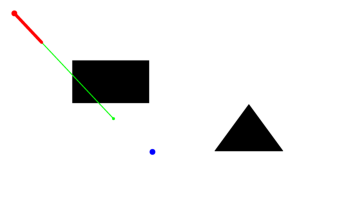

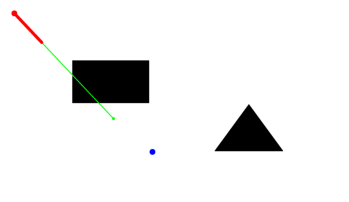

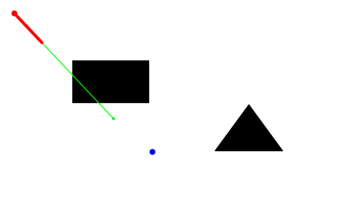

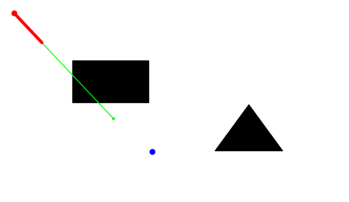

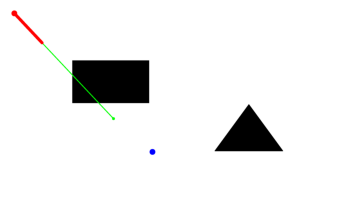

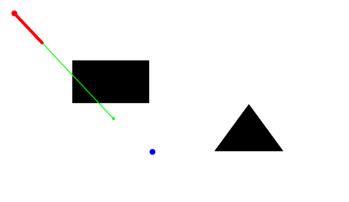

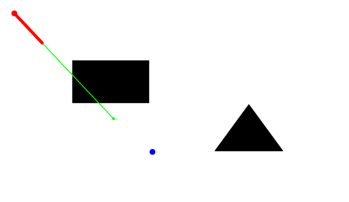

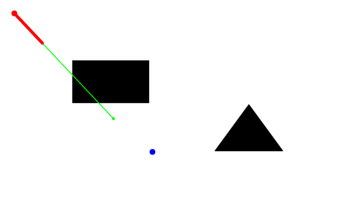

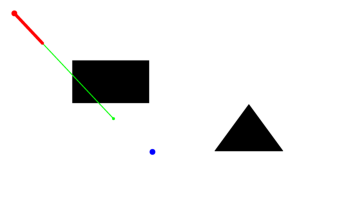

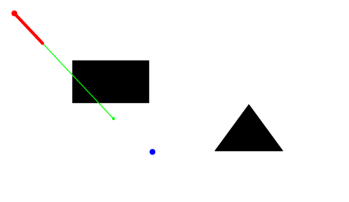

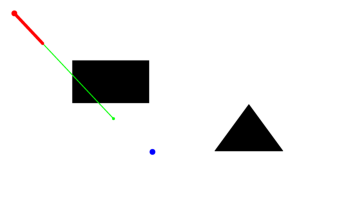

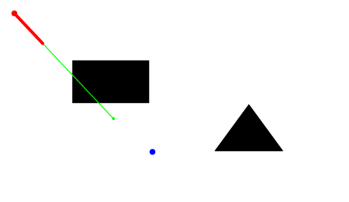

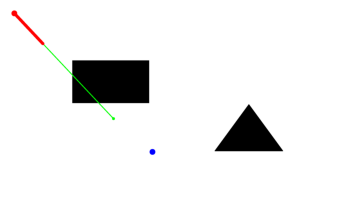

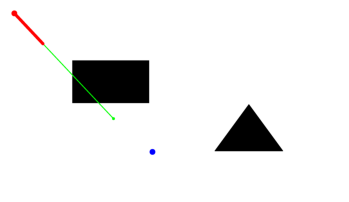

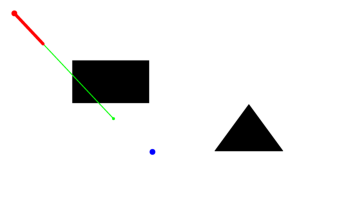

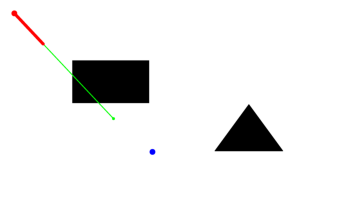

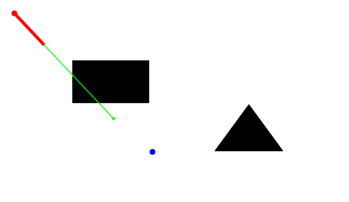

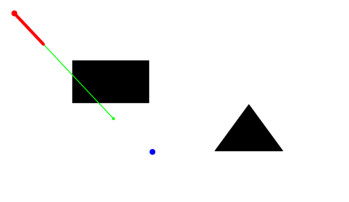

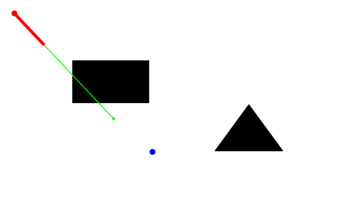

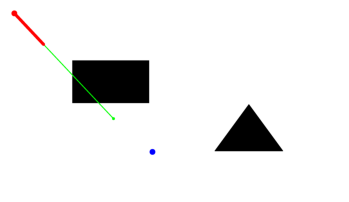

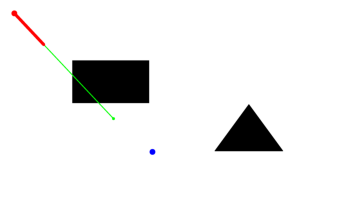

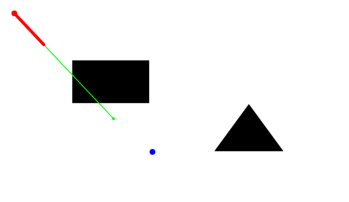

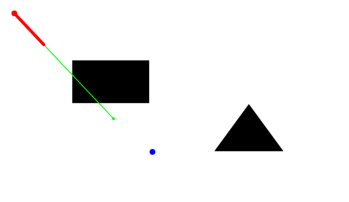

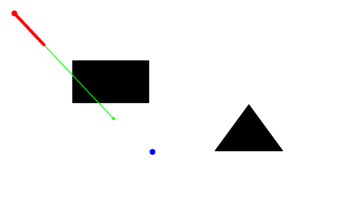

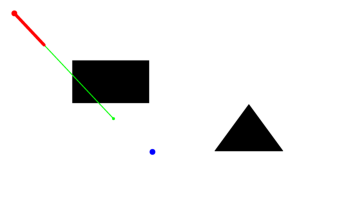

In [11]:
rad = math.atan2(qRand.y-tree[mIndex].y, qRand.x-tree[mIndex].x)
obstacle = False
check = point()
for i in range(gamma):
    check.x = int(np.cos(rad)*i + tree[mIndex].x)
    check.y = int(np.sin(rad)*i + tree[mIndex].y)        
    map_rrt = cv2.circle(map_rrt, (check.x,check.y), 10, (255,0,0), -1)        

    if set(map_rrt[check.y, check.x]) == set([0,0,0]):            
        print("Obstacle Found \n\n")
        obstacle = True
        
    plt.axis('off') # 창에있는 x축 y축 제거
    plt.imshow(map_rrt)
    plt.show()

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [55]:
# 랜덤노드 생성 함수
# 최소길이 = gamma, 최대길이 가로세로길이중 gamma를 빼야 초과하지 않음.
def generate_random_node(x_max,y_max,gamma):
    return (random.randint(0+gamma, x_max-gamma), random.randint(0+gamma, y_max-gamma))

# 트리 안에 있는 노드중 최소길이 찾기
def find_nearest_node(tree,node):
    distances = [(n[0]-node[0])**2 + (n[1]-node[1])**2 for n in tree]
    nearest_node_idx = np.argmin(distances)
    return tree[nearest_node_idx]

# 랜덤노드와 그에 가까운 노드 중간의 새로운 노드 생성
def generate_new_node(nearest_node,random_node):
    distance = np.sqrt((nearest_node[0]-random_node[0])**2 + (nearest_node[1]-random_node[1])**2)
    
    #스텝 사이즈를 거리의 절반으로 자른다.
    step_size = distance/2
    
    theta = np.arctan2(random_node[1]-nearest_node[1],random_node[0]-nearest_node[0])
    return (nearest_node[0]+step_size*cos(theta),nearest_node[1]+step_size*np.sin(theta))
    
def is_collision(tree, new_node, map_image):
    for node in tree:
        # Draw a line between the new node and the existing node
        x1, y1 = int(node[0]), int(node[1])
        x2, y2 = int(new_node[0]), int(new_node[1])
        cv2.line(map_image, (x1, y1), (x2, y2), (255, 255, 255), 1)
        # Check if the line intersects with any obstacle
        if np.any(map_image[min(y1, y2):max(y1, y2), min(x1, x2):max(x1, x2)] == 0):
            return True
    return False

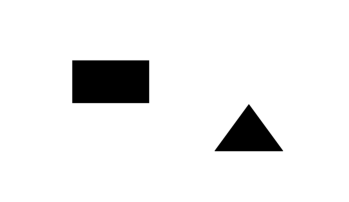

In [23]:
map_ori = cv2.imread('map.png',0)
y_max,x_max = map_ori.shape
map_ori = cv2.cvtColor(map_ori, cv2.COLOR_BGR2RGB)

plt.axis('off') # 창에있는 x축 y축 제거
plt.imshow(map_ori)
plt.show()

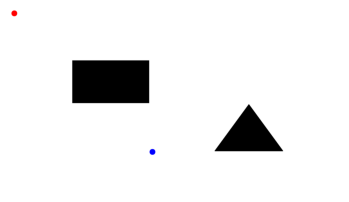

Image height :  1296 , Image width :  2304


In [73]:
# 출발 노드 설정
start_node = (50,50)
tree = [start_node]
map_rrt = cv2.circle(map_image, (start_node[0],start_node[1]), 20, (255,0,0), -1)

# 목표 노드 설정
goal_node = (1000,1000)
map_rrt = cv2.circle(map_rrt, (goal_node[0],goal_node[1]), 20, (0,0,255), -1)

plt.axis('off')
plt.imshow(map_rrt)
plt.show()

print("Image height : " , y_max, ", Image width : ",x_max)

In [75]:
# 랜덤노드 최솟값 설정
gamma = 300


random_node = generate_random_node(x_max,y_max,gamma)

nearst_node = find_nearest_node(tree,random_node)

new_node = generate_new_node(nearest_node,random_node)

if not is_collision(tree,new_node,map_image):
    

SyntaxError: incomplete input (1142599637.py, line 12)

In [78]:
x1, y1 = int(node[0]), int(node[1])
x2, y2 = int(new_node[0]), int(new_node[1])
cv2.line(map_image, (x1, y1), (x2, y2), (255, 255, 255), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]